# Assignment No. 2: Data Wrangling - ll

Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques
to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease
the skewness and convert the distribution into a normal distribution.


### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Read Dataset

In [2]:
df = pd.read_csv('exam.csv')
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


#### Checking For Heads

In [3]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


###check for Info of dataset

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

###check for null values in dataset

In [5]:
df.isnull().sum() 

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

###Checking datatypes 

In [6]:
df.dtypes 

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

### Checking for any Outliers

By ploting scatter Matrix

array([[<AxesSubplot:xlabel='raisedhands', ylabel='raisedhands'>,
        <AxesSubplot:xlabel='VisITedResources', ylabel='raisedhands'>,
        <AxesSubplot:xlabel='AnnouncementsView', ylabel='raisedhands'>,
        <AxesSubplot:xlabel='Discussion', ylabel='raisedhands'>],
       [<AxesSubplot:xlabel='raisedhands', ylabel='VisITedResources'>,
        <AxesSubplot:xlabel='VisITedResources', ylabel='VisITedResources'>,
        <AxesSubplot:xlabel='AnnouncementsView', ylabel='VisITedResources'>,
        <AxesSubplot:xlabel='Discussion', ylabel='VisITedResources'>],
       [<AxesSubplot:xlabel='raisedhands', ylabel='AnnouncementsView'>,
        <AxesSubplot:xlabel='VisITedResources', ylabel='AnnouncementsView'>,
        <AxesSubplot:xlabel='AnnouncementsView', ylabel='AnnouncementsView'>,
        <AxesSubplot:xlabel='Discussion', ylabel='AnnouncementsView'>],
       [<AxesSubplot:xlabel='raisedhands', ylabel='Discussion'>,
        <AxesSubplot:xlabel='VisITedResources', ylabel='Discussion

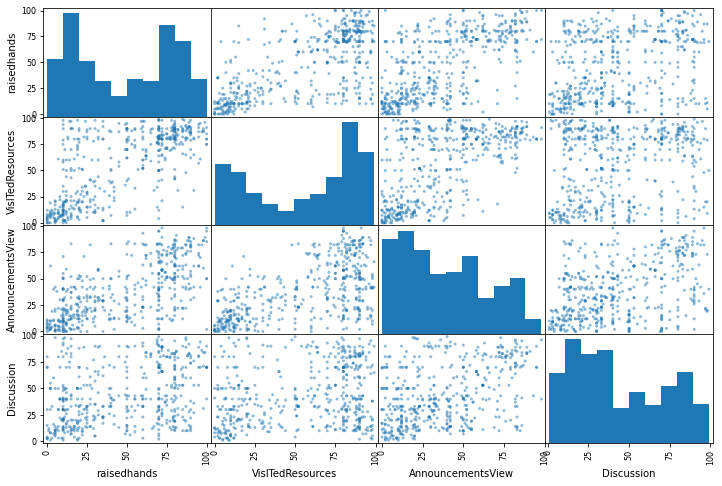

In [7]:
from pandas.plotting import scatter_matrix
num_attribs=['raisedhands','VisITedResources','AnnouncementsView','Discussion']
scatter_matrix(df[num_attribs],figsize=(12,8))

In [8]:
df['raisedhands'].describe()

count    480.000000
mean      46.775000
std       30.779223
min        0.000000
25%       15.750000
50%       50.000000
75%       75.000000
max      100.000000
Name: raisedhands, dtype: float64

## Transformation of Data 

BY calculating std devition then descale

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df[['raisedhands']]=sc.fit_transform(df[['raisedhands']])

In [10]:
df['raisedhands'].describe()

count    4.800000e+02
mean     4.440892e-17
std      1.001043e+00
min     -1.521279e+00
25%     -1.009037e+00
50%      1.048878e-01
75%      9.179714e-01
max      1.731055e+00
Name: raisedhands, dtype: float64

                                                                                                            --> shivam borse